In [7]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
train_df = pd.read_csv("/content/train.csv")

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train_df['PassengerId'] = train_df['PassengerId'].astype(str)

In [14]:
train_df.dtypes

,0
PassengerId,object
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Around 38% of passengers survived.
Most passengers were in lower classes. Majority were in 3rd class.
Average passenger was 29 years old. Most were young adults (20s-30s).
Most people traveled alone or with one person.
Most passengers had no parents/children onboard.
Some passengers had free tickets. Most fares were low.
Univariate Analysis (Single Variable)
Numerical Features:

Plot distributions using histograms (sns.histplot()) or KDE plots.
Check skewness (df.skew()) and consider transformations if needed.
Categorical Features:

Bar plots for Pclass, Sex, Embarked, etc.
Count plots using sns.countplot() to see class distribution.

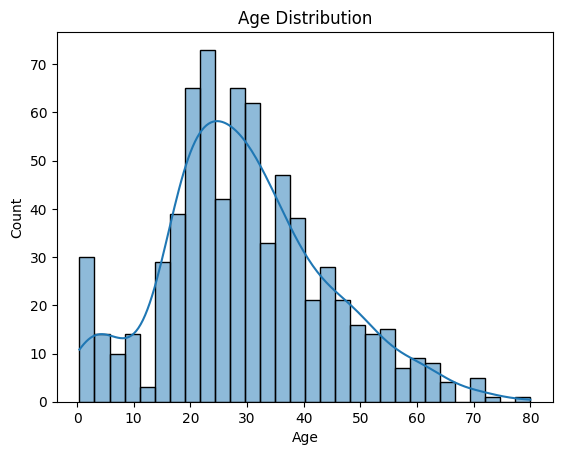

In [15]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

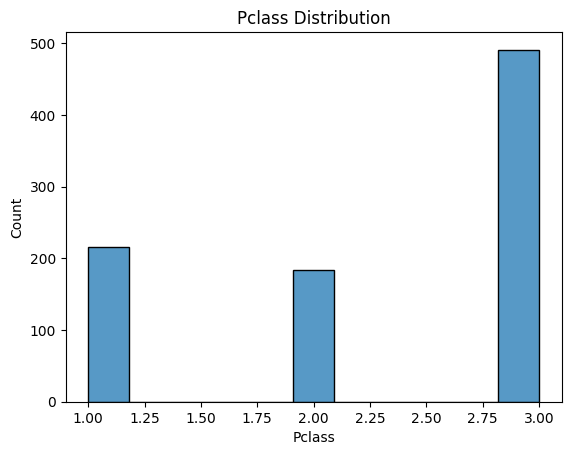

In [16]:
sns.histplot(train_df['Pclass'])
plt.title("Pclass Distribution")
plt.show()

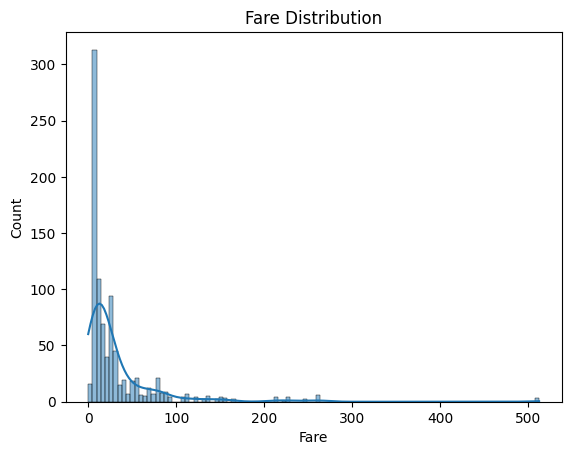

In [17]:
sns.histplot(train_df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

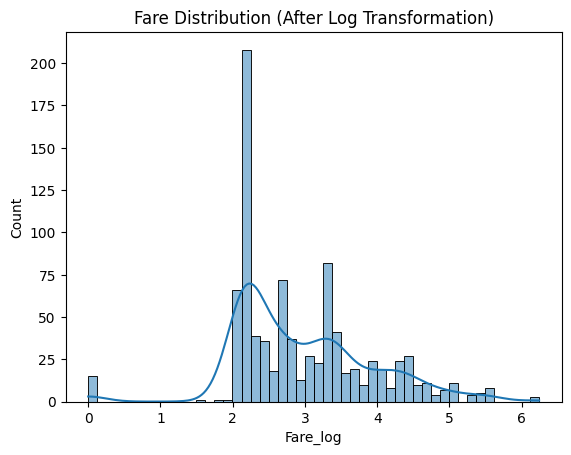

In [18]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])  # log1p to handle zero values
sns.histplot(train_df['Fare_log'], bins=50, kde=True)
plt.title("Fare Distribution (After Log Transformation)")
plt.show()

In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_log'],
      dtype='object')

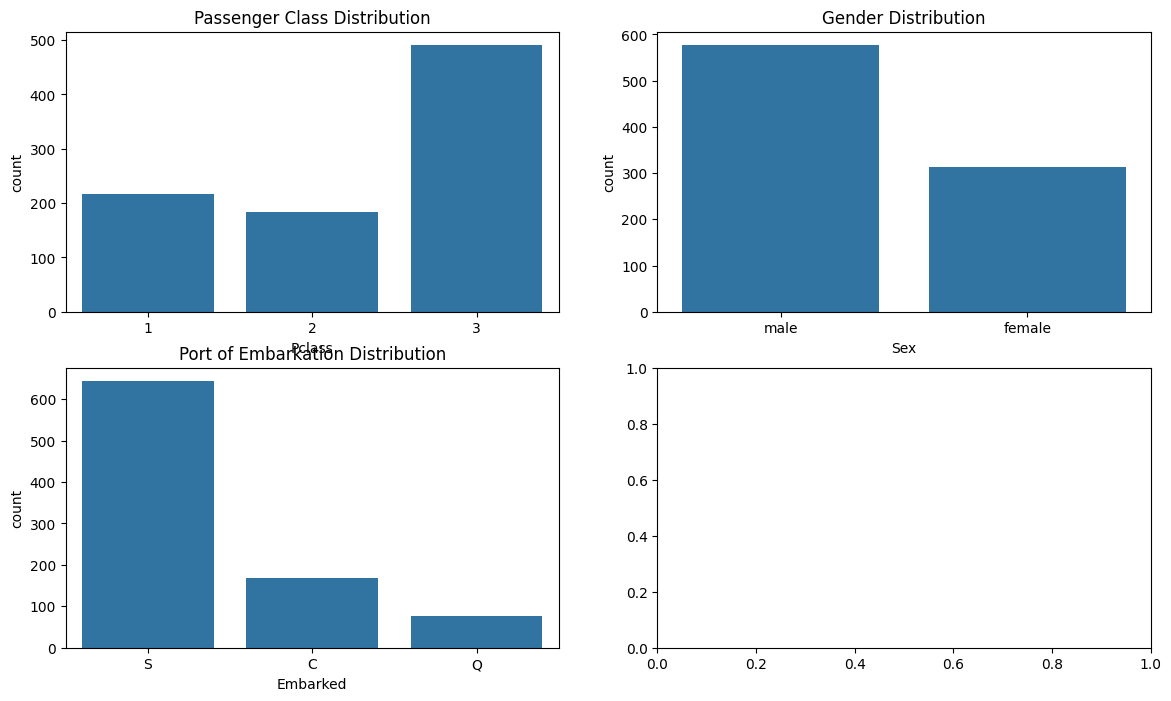

In [25]:
# Count plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(14,8))

sns.countplot(x='Pclass', data=train_df, ax=axes[0][0])
axes[0][0].set_title("Passenger Class Distribution")

sns.countplot(x='Sex', data=train_df, ax=axes[0][1])
axes[0][1].set_title("Gender Distribution")

sns.countplot(x='Embarked', data=train_df, ax=axes[1][0])
axes[1][0].set_title("Port of Embarkation Distribution")


plt.show()

Bivariate Analysis (Two Variables)¶
Survival vs Features:
Compare survival rates across different features (Pclass, Sex, Fare, Deck).
Box plots for Fare vs Survived (sns.boxplot(x='Survived', y='Fare', data=df)).
Stacked bar plots to analyze categorical relationships.
Correlation Analysis:
Compute correlation matrix (df.corr()) to check relationships.
Heatmap of correlations (sns.heatmap(df.corr(), annot=True, cmap='coolwarm')).

Text(0.5, 1.0, 'Embarkation point vs Survived')

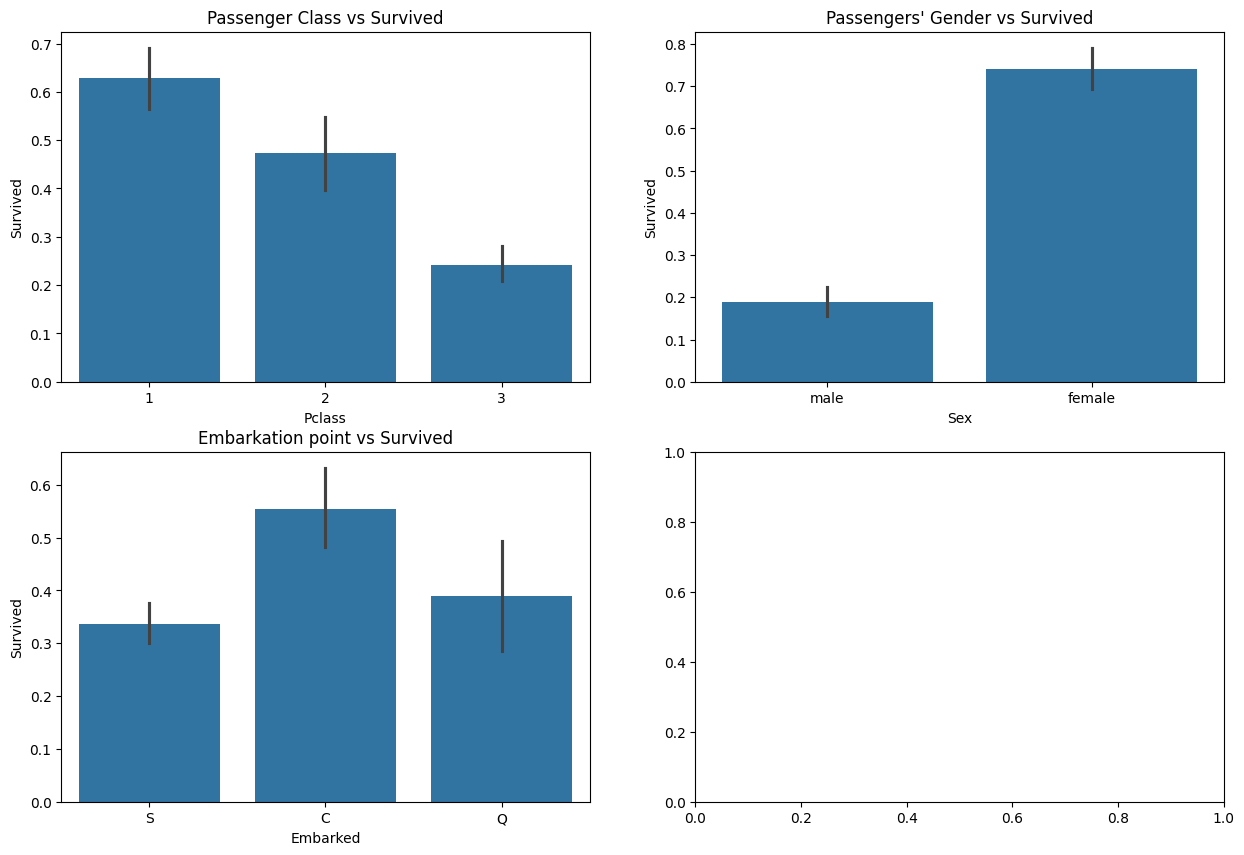

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0][0])
axes[0][0].set_title("Passenger Class vs Survived")

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0][1])
axes[0][1].set_title("Passengers' Gender vs Survived")

sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[1][0])
axes[1][0].set_title("Embarkation point vs Survived")

Text(0.5, 1.0, "Passengers' Fare vs Survived")

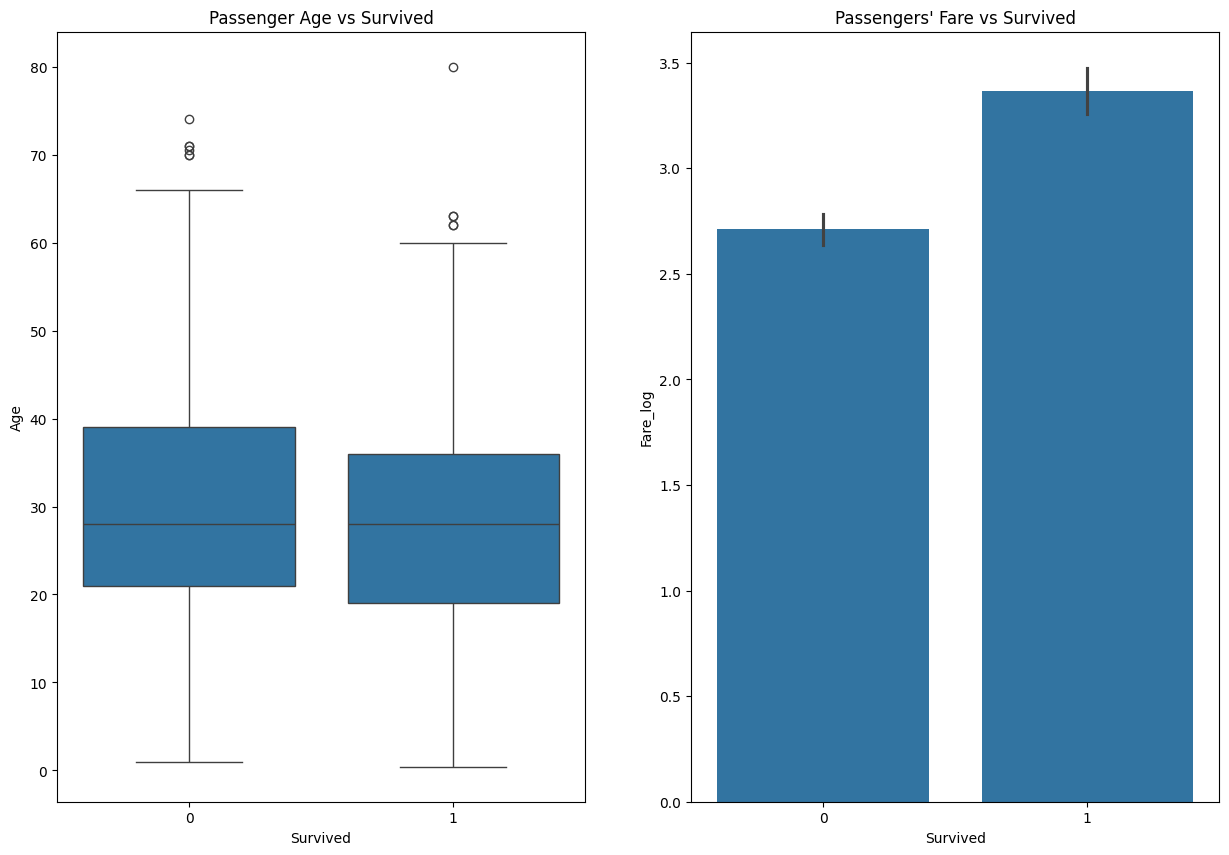

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.boxplot(x='Survived', y='Age', data=train_df, ax=axes[0])
axes[0].set_title("Passenger Age vs Survived")

sns.barplot(x='Survived', y='Fare_log', data=train_df, ax=axes[1])
axes[1].set_title("Passengers' Fare vs Survived")

Correlation Analysis

<Axes: >

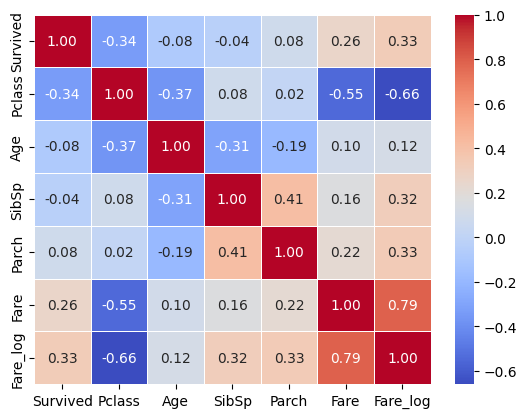

In [28]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Feature Engineering Insights¶
Does Fare need binning? (Low, Medium, High)
Fare values vary widely (0 to 512), and we saw earlier that it's skewed. Binning into Low, Medium, High could help capture survival patterns better.

In [30]:
train_df['Fare_Binned'] = pd.cut(train_df['Fare'], bins=[0, 10, 50, 600], labels=['Low', 'Medium', 'High'])

Group Age into categories (Child, Teen, Adult, Senior).
Children were more likely to be saved (women & children first). Seniors might have had a lower survival rate. Binning Helps model understand age patterns better.

In [31]:
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

Size Feature: Combine SibSp and Parch into a new feature.
Solo travelers may have had a harder time surviving. Large families might have struggled together. Creates a new perspective beyond just sibling/parent counts.

In [32]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

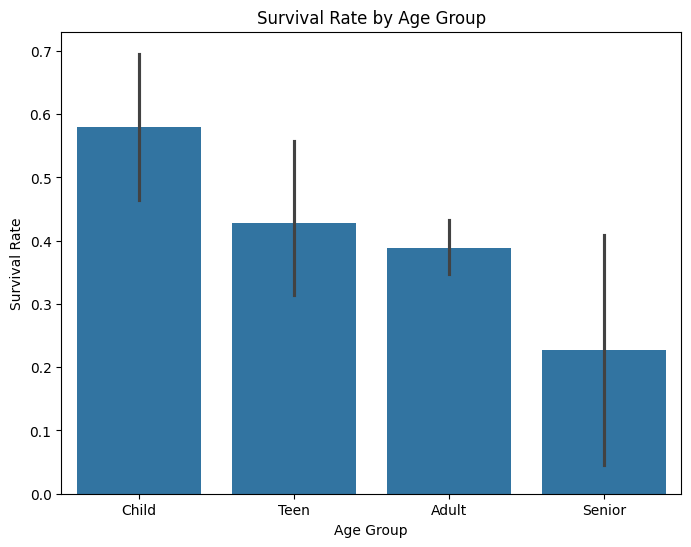

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Survived', data=train_df)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

This shows that the survival rate of children is the highest.

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Fare_log     891 non-null    float64 
 13  Fare_Binned  876 non-null    category
 14  Age_Group    714 non-null    category
 15  Family_Size  891 non-null    int64   
dtypes: category(2), float64(3), int64(5), object(6)
memory usage: 99.7+ KB


<Axes: >

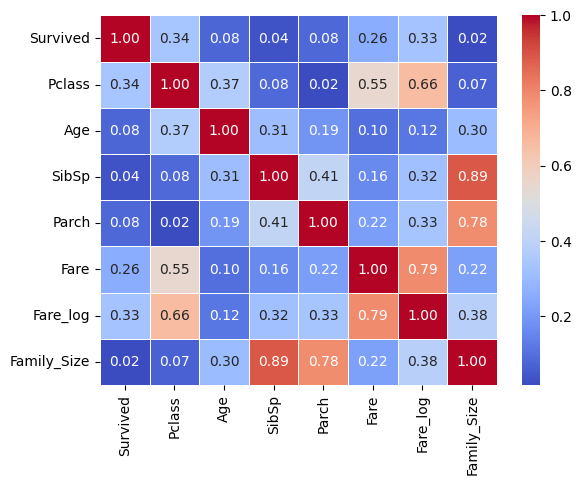

In [34]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr().abs(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Advanced Visualizations
Pairplot for numerical features: (sns.pairplot(df, hue='Survived')).
Violin plots & Swarm plots for better insights.
Survival rate by Deck (if Deck is created from Cabin).

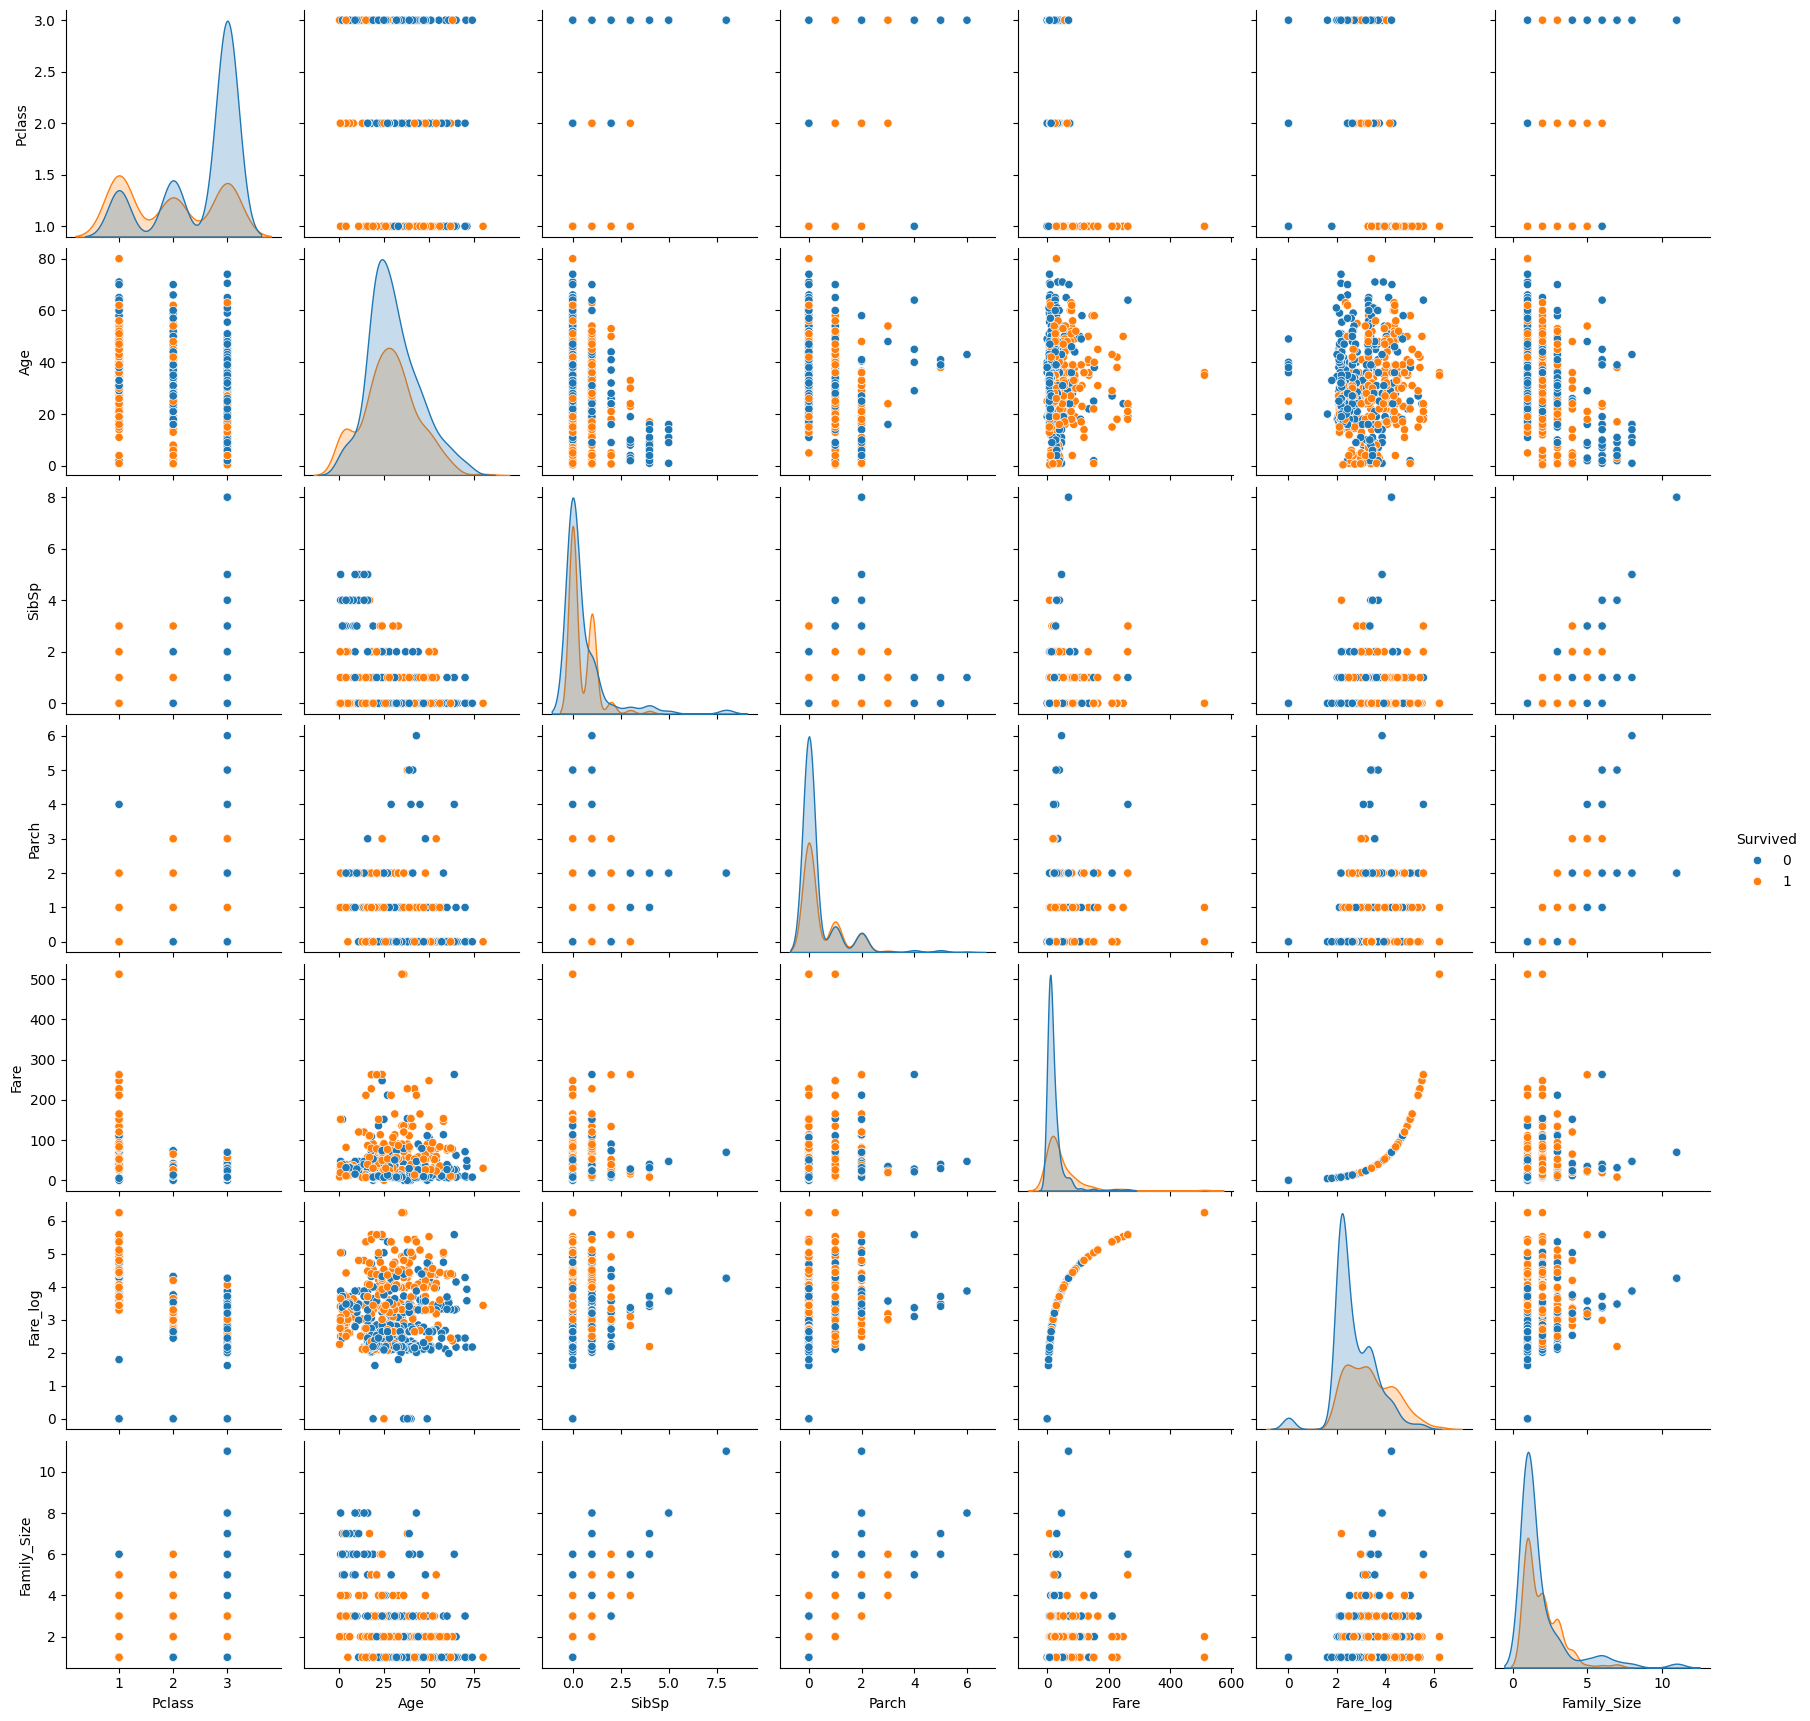

In [35]:
sns.pairplot(train_df, hue='Survived')

Key points:

1. Gender Affected Survival
Females had a significantly higher survival rate than males.

Survival Rate for Females: ~75%

Survival Rate for Males: ~20%

This supports the principle of "women and children first" during evacuation.

2. Passenger Class Impact
Higher-class passengers had a better chance of survival.

1st Class: ~63% survived

2nd Class: ~47% survived

3rd Class: ~24% survived

Likely due to better access to lifeboats and cabins closer to the deck.

 3. Children Had Higher Survival Rate
Children (especially under age 10) had increased chances of survival.

Often prioritized along with women.

 4. Port of Embarkation
Passengers from Cherbourg (C) had higher survival rates.

Could be correlated with wealthier passengers or those in higher classes boarding there.

5. Fare Correlated with Survival
Passengers who paid higher fares had higher survival rates, again aligning with class-based trends.

 6. Family Size / SibSp & Parch
Small families (1-2 members onboard) had slightly better survival rates.

Very large families had lower survival—possibly due to difficulty evacuating together.

